In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
df= pd.read_csv("../input/london-bike-sharing-dataset/london_merged.csv", parse_dates=['timestamp'], index_col="timestamp")

df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000


In [3]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

In [4]:
df['season_name'] = df['season'].replace({0:"Spring", 1:"Summer", 2:"Autumn", 3:"Winter"})

In [5]:
import plotly.express as px
fig = px.line(x=df.index, y=df.cnt)
fig.show()

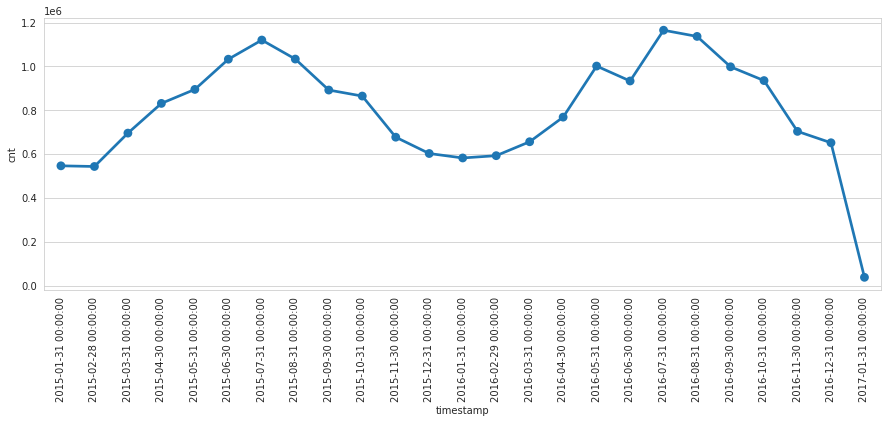

In [6]:
data_by_month = df.resample('M').sum()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.pointplot(x=data_by_month.index, y=data_by_month.cnt);

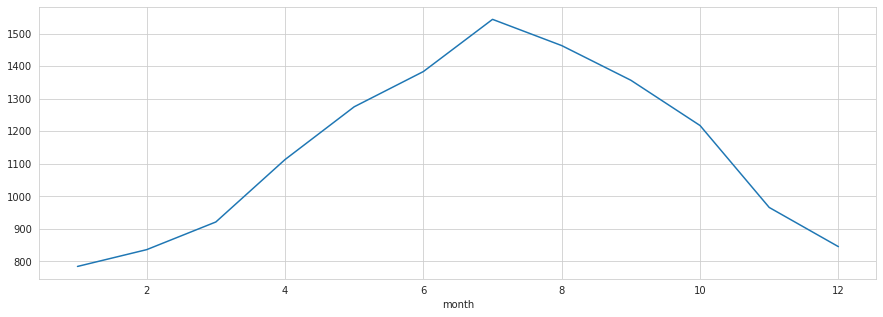

In [7]:
month_cnt = df.groupby("month")["cnt"].mean()
plt.figure(figsize=(15,5))
sns.lineplot(month_cnt.index, month_cnt.values);

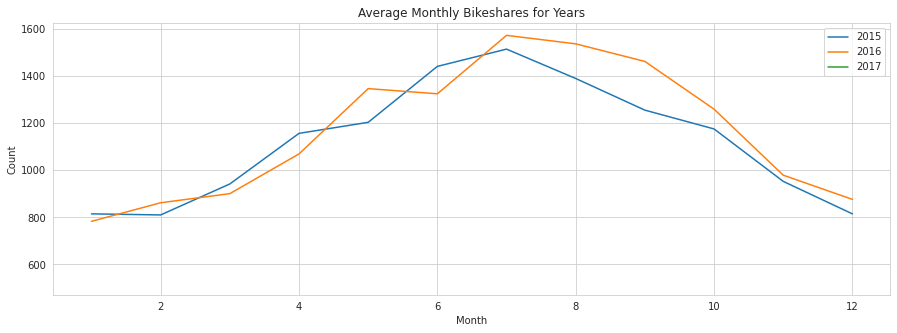

In [8]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

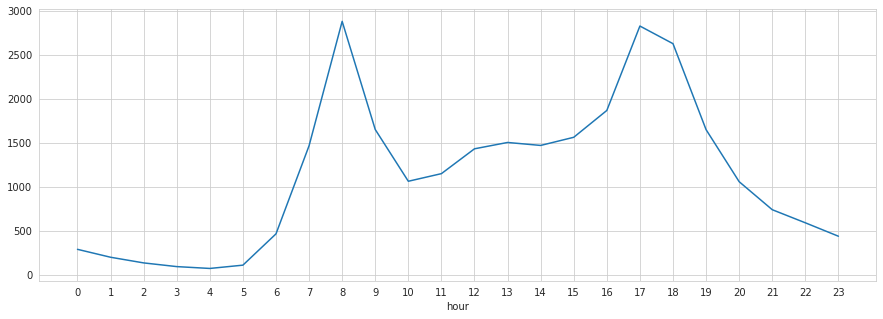

In [9]:
hour_cnt = df.groupby("hour")["cnt"].mean()
plt.figure(figsize=(15,5))
plt.xticks(np.arange(24))
sns.lineplot(hour_cnt.index, hour_cnt.values);

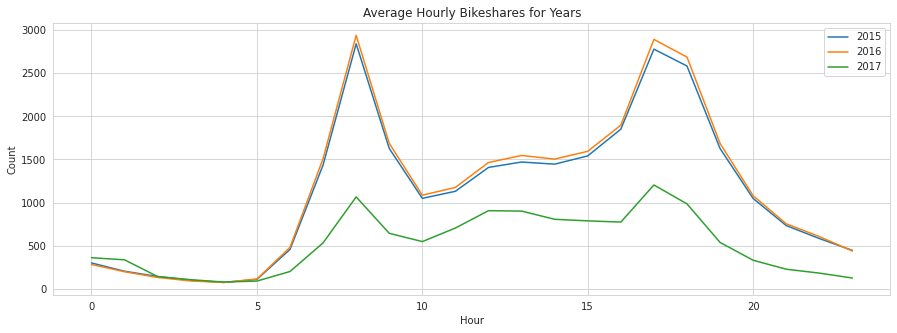

In [10]:
year_hour_cnt = df.groupby(["year", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Years')
plt.show()

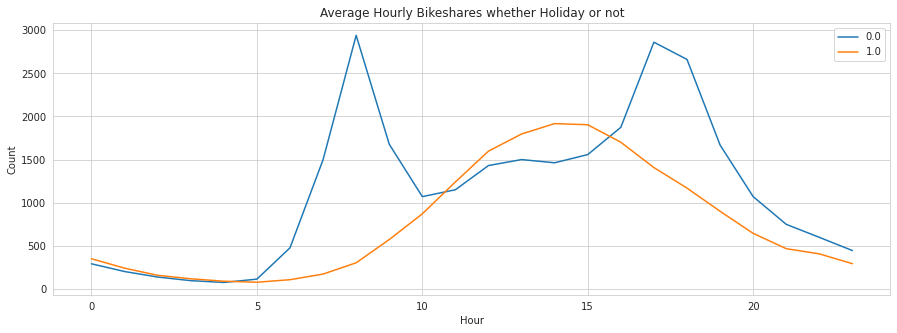

In [11]:
#df.groupby(["hour","is_holiday"]).agg({"cnt" :"mean"}).unstack(level=1).plot.line(figsize=(15,5))

hour_holiday_cnt = df.groupby(["is_holiday","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_holiday in hour_holiday_cnt.index.levels[0]:
    plt.plot(hour_holiday_cnt[is_holiday].index, hour_holiday_cnt[is_holiday], label=is_holiday)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Holiday or not')
plt.show()

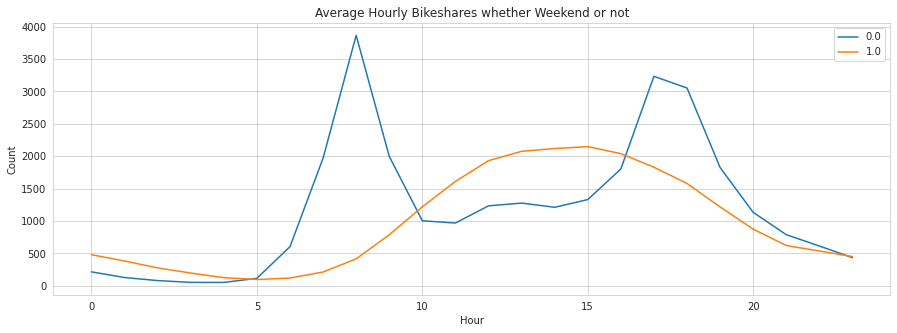

In [12]:
#df.groupby(["hour","is_weekend"]).agg({"cnt" :"mean"}).unstack(level=1).plot.line(figsize=(15,5))

hour_weekend_cnt = df.groupby(["is_weekend","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_weekend in hour_weekend_cnt.index.levels[0]:
    plt.plot(hour_weekend_cnt[is_weekend].index, hour_weekend_cnt[is_weekend], label=is_weekend)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Weekend or not')
plt.show()

In [13]:
df.groupby(["is_holiday","is_weekend"])["cnt"].count()

is_holiday  is_weekend
0.000       0.000         12060
            1.000          4970
1.000       0.000           384
Name: cnt, dtype: int64

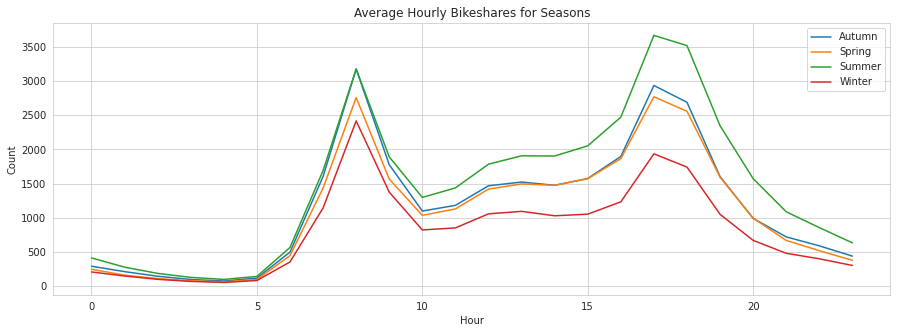

In [14]:
season_hour_cnt = df.groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_hour_cnt.index.levels[0]:
    plt.plot(season_hour_cnt[season].index, season_hour_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Seasons')
plt.show()

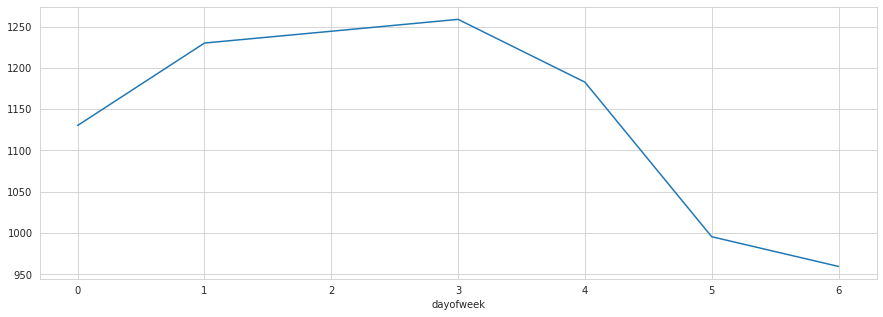

In [15]:
weekday_cnt = df.groupby("dayofweek")["cnt"].mean()
plt.figure(figsize=(15,5))
sns.lineplot(weekday_cnt.index, weekday_cnt.values);

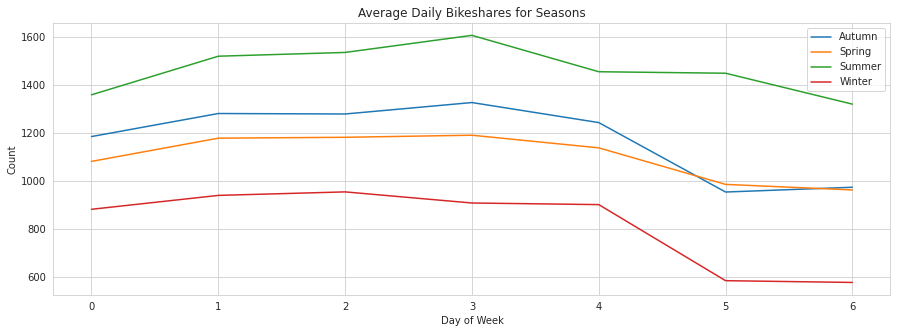

In [16]:
season_dayofweek_cnt = df.groupby(["season_name", "dayofweek"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_dayofweek_cnt.index.levels[0]:
    plt.plot(season_dayofweek_cnt[season].index, season_dayofweek_cnt[season],label=season)

plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Daily Bikeshares for Seasons')
plt.show()

In [17]:
df_holiday=df[df['is_holiday']==1]

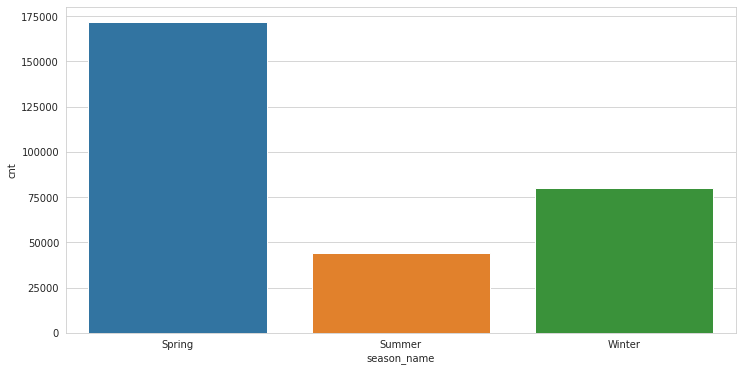

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='season_name', y='cnt', data=df_holiday, ci=None, estimator=sum);

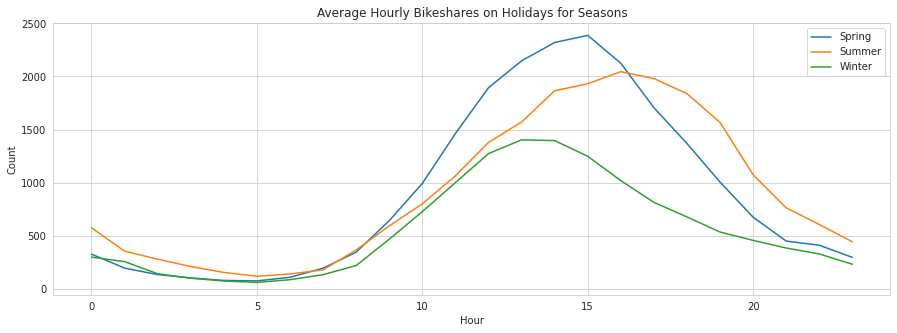

In [19]:
season_holiday_cnt = df_holiday.groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_holiday_cnt.index.levels[0]:
    plt.plot(season_holiday_cnt[season].index, season_holiday_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Holidays for Seasons')
plt.show()

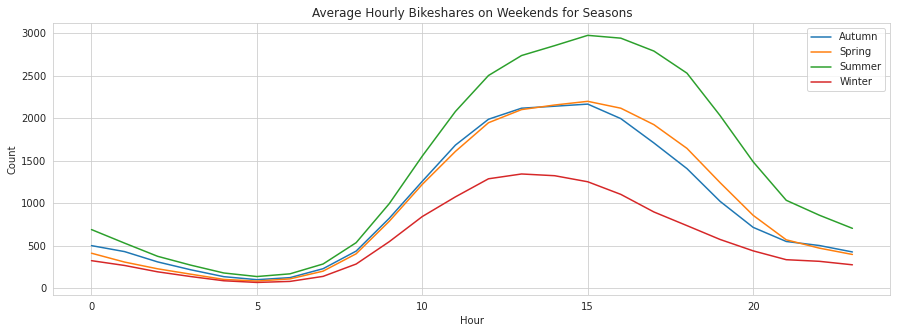

In [20]:
season_weekend_cnt = df[df["is_weekend"]==1].groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_weekend_cnt.index.levels[0]:
    plt.plot(season_weekend_cnt[season].index, season_weekend_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Weekends for Seasons')
plt.show()

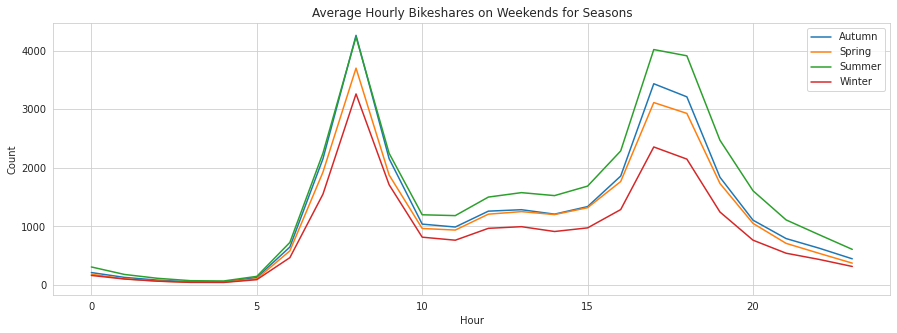

In [21]:
season_weekend_cnt = df[df["is_weekend"]==0].groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_weekend_cnt.index.levels[0]:
    plt.plot(season_weekend_cnt[season].index, season_weekend_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Weekends for Seasons')
plt.show()

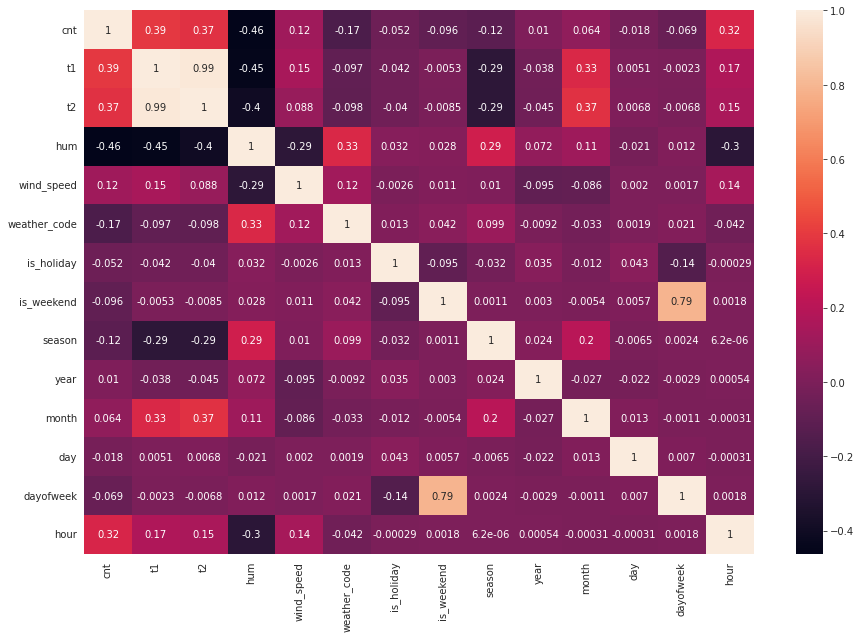

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

weather_code
1.000    1162.089
2.000    1496.177
3.000    1195.124
4.000     635.231
7.000     712.966
10.000    583.429
26.000    250.850
Name: cnt, dtype: float64


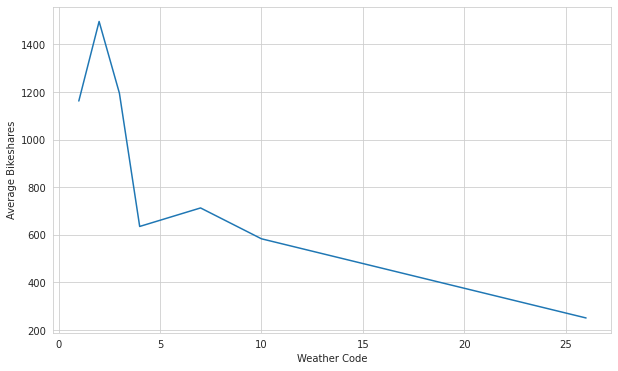

In [23]:
plt.figure(figsize=(10,6))
ax = df.groupby('weather_code')['cnt'].mean().plot()
ax.set(xlabel='Weather Code')
ax.set(ylabel='Average Bikeshares')
print(df.groupby('weather_code')['cnt'].mean())

In [24]:
df_raw = df.drop(["t2", "date", "year", "season_name", "season", "month", "dayofweek", "day", "hour"], axis=1)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


In [25]:
weather_dummy = pd.get_dummies(df_raw['weather_code'].astype("str"), prefix="w_code", drop_first=True)
df_dum = pd.concat([df_raw, weather_dummy],axis=1).drop(["weather_code"],axis=1)
df_dum.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,93.000,6.000,0.000,1.000,0,0,0,1,0,0
2015-01-04 01:00:00,138,3.000,93.000,5.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 02:00:00,134,2.500,96.500,0.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 03:00:00,72,2.000,100.000,0.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 04:00:00,47,2.000,93.000,6.500,0.000,1.000,0,0,0,0,0,0


In [26]:
train_size = int(len(df_dum) * 0.9)
test_size = len(df_dum) - train_size

train, test = df_dum.iloc[0:train_size], df_dum.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

In [29]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys) #x = np.asarray(x).astype('float32').

In [30]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15648, 24, 12) (15648,)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
X_train.shape

(15648, 24, 12)

In [34]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [35]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               144384    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 144,641
Trainable params: 144,641
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          shuffle=False,
          callbacks=[early_stop])

2021-11-13 14:03:11.209790: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
343/343 [==============================] - 18s 40ms/step - loss: 0.1412 - val_loss: 0.1071
Epoch 2/30
343/343 [==============================] - 13s 37ms/step - loss: 0.0588 - val_loss: 0.0728
Epoch 3/30
343/343 [==============================] - 12s 36ms/step - loss: 0.0437 - val_loss: 0.0592
Epoch 4/30
343/343 [==============================] - 13s 37ms/step - loss: 0.0344 - val_loss: 0.0522
Epoch 5/30
343/343 [==============================] - 12s 35ms/step - loss: 0.0284 - val_loss: 0.0409
Epoch 6/30
343/343 [==============================] - 12s 36ms/step - loss: 0.0256 - val_loss: 0.0375
Epoch 7/30
343/343 [==============================] - 13s 38ms/step - loss: 0.0232 - val_loss: 0.0383
Epoch 8/30
343/343 [==============================] - 12s 36ms/step - loss: 0.0221 - val_loss: 0.0351
Epoch 9/30
343/343 [==============================] - 12s 36ms/step - loss: 0.0204 - val_loss: 0.0329
Epoch 10/30
343/343 [==============================] - 13s 37ms/step - loss: 0.020

<AxesSubplot:>

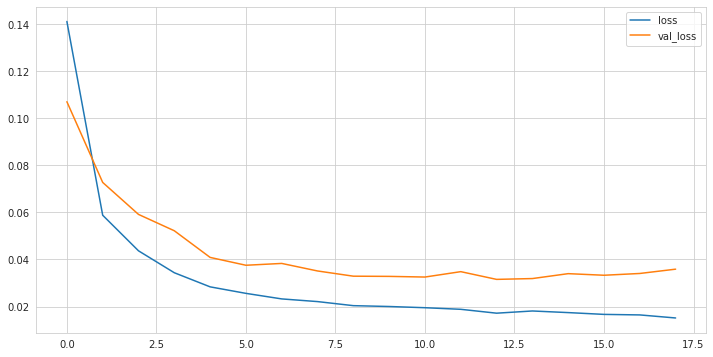

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [42]:
eval_metrics(y_test, y_pred)

r2_score: 0.9648563501316515 
 mae: 0.075802224645472 
 mse: 0.014418109523310808 
 rmse: 0.12007543263844944


In [43]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [44]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index

In [45]:
pred_test.head()

,test,prediction
timestamp,,
2016-10-24 08:00:00,3985.000,3826.376
2016-10-24 09:00:00,2070.000,1969.701
2016-10-24 10:00:00,968.000,1020.784
2016-10-24 11:00:00,965.000,875.872
2016-10-24 12:00:00,1180.000,1172.382


In [46]:
eval_metrics(y_test_inv.flatten(), y_pred_inv.flatten())

r2_score: 0.9648563511878555 
 mae: 110.06482940780408 
 mse: 30397.7570668628 
 rmse: 174.34952557108608


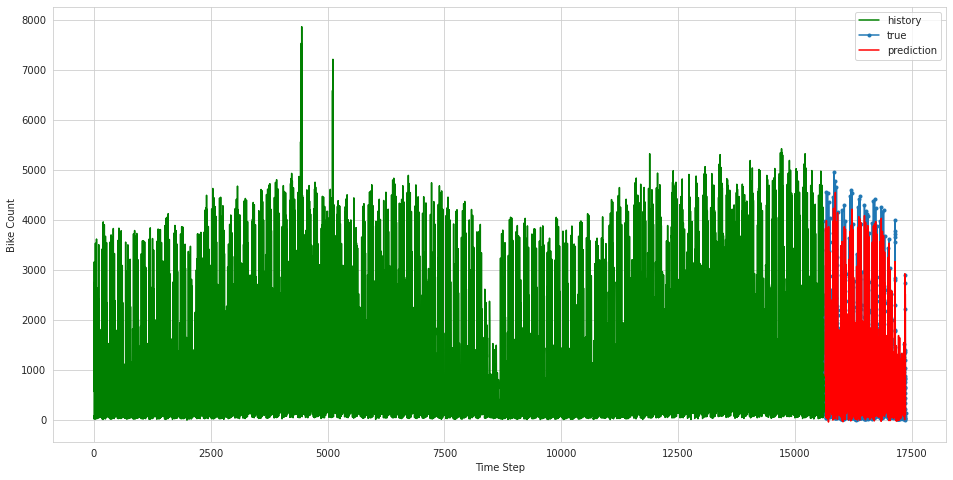

In [47]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

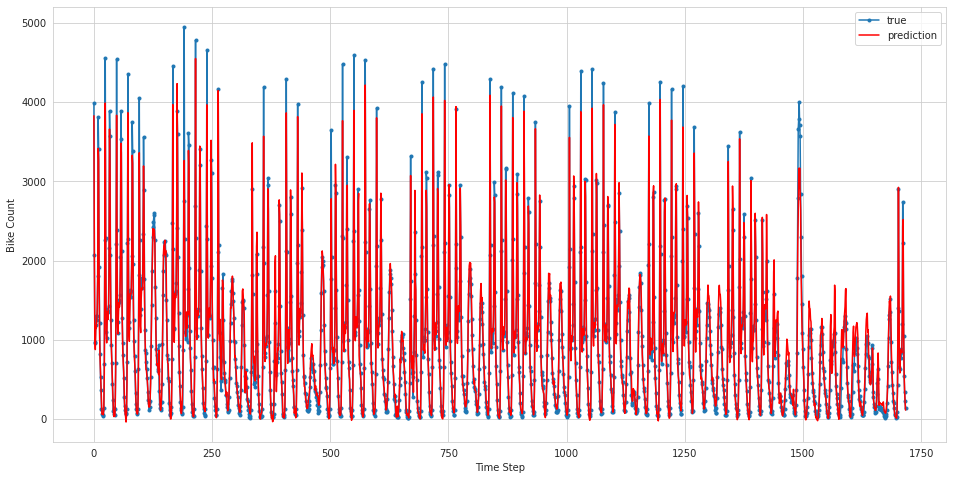

In [48]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

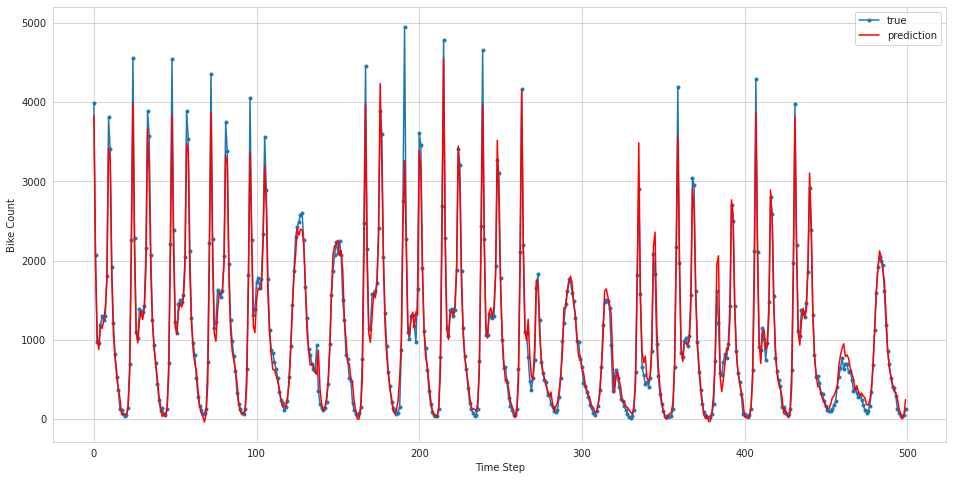

In [49]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

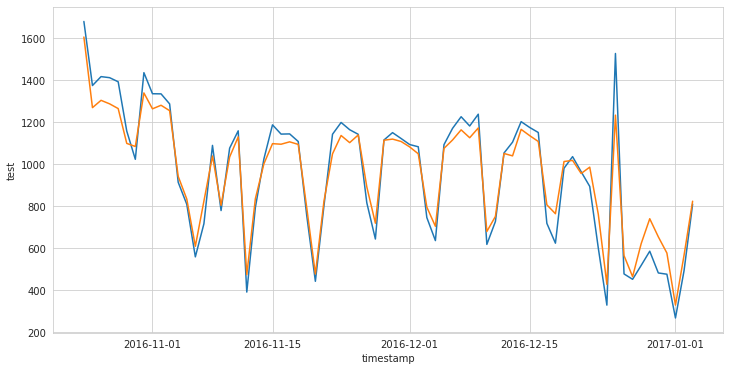

In [50]:
data_by_day = pred_test.resample('24H').mean()
sns.lineplot(x=data_by_day.index, y='test', data=data_by_day)
sns.lineplot(x=data_by_day.index, y='prediction', data=data_by_day)
plt.show()